## Задание 1. Первичный анализ данных c Pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
# print(data['Weight'])
print(data.head)

<bound method NDFrame.head of          Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971
...         ...       ...
24996  69.50215  118.0312
24997  64.54826  120.1932
24998  64.69855  118.2655
24999  67.52918  132.2682
25000  68.87761  124.8740

[25000 rows x 2 columns]>


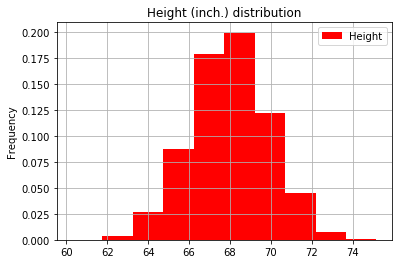

In [26]:
data.plot(y='Height', density=True, bins=10, color='red', kind='hist', title='Height (inch.) distribution').grid()

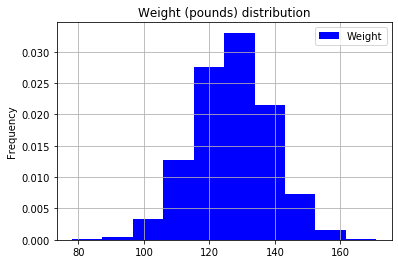

In [28]:
data.plot(y='Weight', density=True, bins=10, color='blue', kind='hist', title='Weight (pounds) distribution').grid()

In [32]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

###### Pandas DataFrame apply

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x18CE9950>,
      dtype=object)

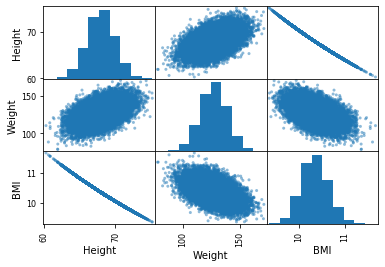

In [46]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Height']), axis=1)
pd.plotting.scatter_matrix(data)

###### Seaborn pairplot

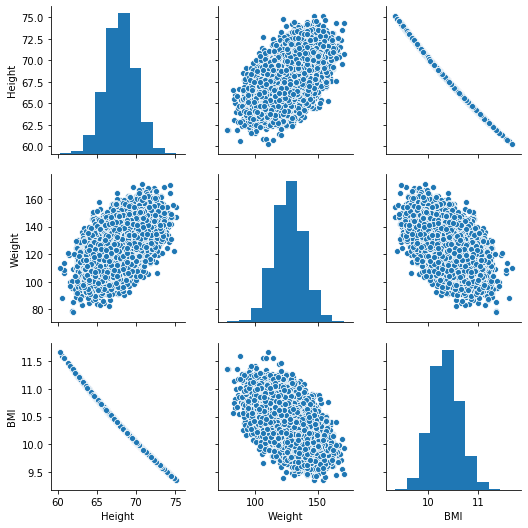

In [45]:
sns.pairplot(data)
# sns.pairplot(data, vars=['Weight', 'Height'])

###### weiht_category

In [50]:
def weight_category(weight):
    weight = int(weight)
    if weight < 120:
        category = 1
    elif weight >= 150:
        category = 3
    else:
        category = 2
    
    return category

In [54]:
data['Weight_cat'] = data.apply(lambda row: weight_category(row['Weight']), axis=1)
data

,Height,Weight,BMI,Weight_cat
Index,,,,
1,65.78331,112.9925,10.687629,1
2,71.51521,136.4873,9.831022,2
3,69.39874,153.0269,10.130841,3
4,68.21660,142.3354,10.306401,2
5,67.78781,144.2971,10.371593,2
...,...,...,...,...
24996,69.50215,118.0312,10.115768,1
24997,64.54826,120.1932,10.892123,2
24998,64.69855,118.2655,10.866822,1


###### Seaborn boxplot

Text(0, 0.5, 'Рост')

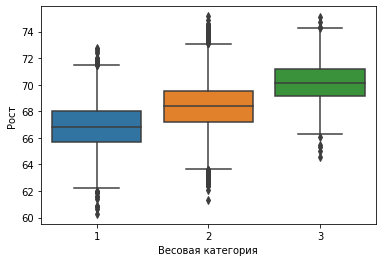

In [61]:
ax = sns.boxplot( x='Weight_cat', y='Height', data=data)
ax.set_xlabel('Весовая категория')
ax.set_ylabel('Рост')

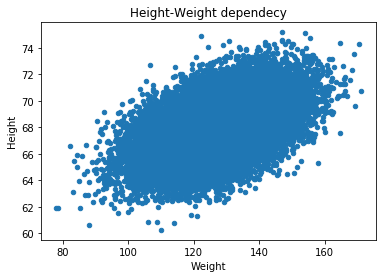

In [71]:
data.plot(x='Weight', y='Height', kind='scatter', title='Height-Weight dependecy')

## Задание 2. Минимизация квадратичной ошибки

In [43]:
def error_(w):
    w_0, w_1 = w
    res = sum(data.apply(lambda row: (row['Height'] - (w_0 + w_1 * row['Weight'])) ** 2, axis=1))
    
    return res

error_((1, 2))

888347706.9984988

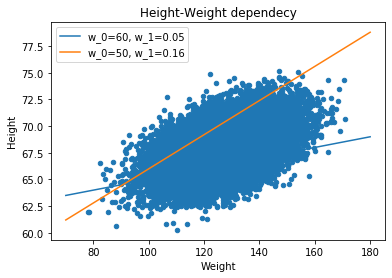

In [88]:
x = np.linspace(70, 180, 2500)
# min(data['Weight'])
# max(data['Weight'])
data.plot(x='Weight', y='Height', kind='scatter', title='Height-Weight dependecy')
plt.plot(x, 60 + 0.05 * x, label='w_0=60, w_1=0.05')
plt.plot(x, 50 + 0.16 * x, label='w_0=50, w_1=0.16')

plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend(loc='best')

Text(0.5, 1.0, 'Error vs w_1 plot(w_0=50)')

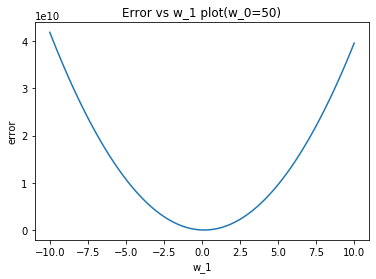

In [44]:
x = np.linspace(-10, 10, 100)
y = error_((50, x))
plt.plot(x, y, label='w_0=50')

plt.xlabel('w_1')
plt.ylabel('error')
plt.title('Error vs w_1 plot(w_0=50)')

In [10]:
from scipy.optimize import minimize_scalar, minimize

In [46]:
w_1_opt = minimize_scalar(lambda w_1: error_((50, w_1)), [-5, 5])
w_1_opt

     fun: 79512.2172869951
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728833175

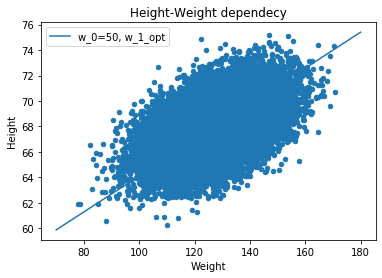

In [42]:
x = np.linspace(70, 180, 2500)

data.plot(x='Weight', y='Height', kind='scatter', title='Height-Weight dependecy')
plt.plot(x, 50 + w_1_opt['x'] * x, label='w_0=50, w_1_opt')

plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend(loc='best')

In [4]:
from mpl_toolkits.mplot3d import Axes3D

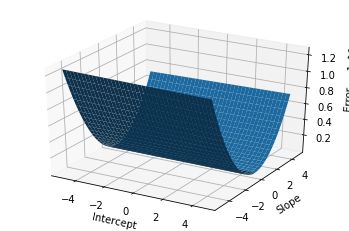

In [40]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
z = error_((x, y))

surf = ax.plot_surface(x, y, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [50]:
bounds = ((-100, 100), (-5, 5))
x_0 = (0, 0)
opt_params = minimize(error_, x_0, bounds=bounds, method='L-BFGS-B')
opt_params

      fun: 67545.28708578378
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01309672,  0.19936124])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57175901,  0.08200662])

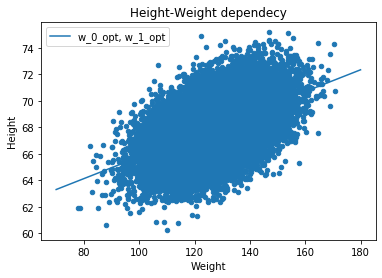

In [53]:
x = np.linspace(70, 180, 2500)

data.plot(x='Weight', y='Height', kind='scatter', title='Height-Weight dependecy')
plt.plot(x, opt_params['x'][0] + opt_params['x'][1] * x, label='w_0_opt, w_1_opt')
# plt.plot(x, 50 + w_1_opt['x'] * x, label='w_0=50, w_1_opt')

plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend(loc='best')